# **Exploratory Data Analysis on Weather history Dataset**

## 1) Data Preparation and Cleaning
>
> -  Try to know more about the dataset given,
>
> -  handle the missing values(if any),
>
> -  then load the final dataset into pandas df.

In [1]:
import pandas as pd
import os

In [2]:
os.listdir()

['EDA_on_WeatherAnalysis.ipynb', 'weather_history_Analysis.csv']

In [3]:
weather_df = pd.read_csv("weather_history_Analysis.csv")

In [4]:
weather_df.head()

,Formatted_Date,Summary,Precip_Type,Temperature_(C),Apparent_Temperature_(C),Humidity,Wind_Speed_(km/h),Wind_Bearing_(degrees),Visibility_(km),Loud_Cover,Pressure_(millibars),Daily_Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [5]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted_Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip_Type               95936 non-null  object 
 3   Temperature_(C)           96453 non-null  float64
 4   Apparent_Temperature_(C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind_Speed_(km/h)         96453 non-null  float64
 7   Wind_Bearing_(degrees)    96453 non-null  int64  
 8   Visibility_(km)           96453 non-null  float64
 9   Loud_Cover                96453 non-null  int64  
 10  Pressure_(millibars)      96453 non-null  float64
 11  Daily_Summary             96453 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 8.8+ MB


In [6]:
# Changing Formatted date column to date time
weather_df[["Date_Time","TimeZone"]]=weather_df["Formatted_Date"].str.split("+",expand=True)
new_df=weather_df.drop(columns="Formatted_Date")
new_df2 = new_df.drop(columns="TimeZone")

# changing the position datetime column
first_column = new_df2.pop('Date_Time')
new_df2.insert(0, 'Date_Time', first_column)

# changing the type of date_time column to datetime
new_df2["Date_Time"]=pd.to_datetime(new_df2["Date_Time"])
new_df2.head()

,Date_Time,Summary,Precip_Type,Temperature_(C),Apparent_Temperature_(C),Humidity,Wind_Speed_(km/h),Wind_Bearing_(degrees),Visibility_(km),Loud_Cover,Pressure_(millibars),Daily_Summary
0,2006-04-01 00:00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [7]:
new_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date_Time                 96453 non-null  datetime64[ns]
 1   Summary                   96453 non-null  object        
 2   Precip_Type               95936 non-null  object        
 3   Temperature_(C)           96453 non-null  float64       
 4   Apparent_Temperature_(C)  96453 non-null  float64       
 5   Humidity                  96453 non-null  float64       
 6   Wind_Speed_(km/h)         96453 non-null  float64       
 7   Wind_Bearing_(degrees)    96453 non-null  int64         
 8   Visibility_(km)           96453 non-null  float64       
 9   Loud_Cover                96453 non-null  int64         
 10  Pressure_(millibars)      96453 non-null  float64       
 11  Daily_Summary             96453 non-null  object        
dtypes: datetime64[ns](

In [8]:
new_df2["Year"]=pd.DatetimeIndex(new_df2["Date_Time"]).year
new_df2["Month"]=new_df2["Date_Time"].dt.month_name()
new_df2["Day"]=new_df2["Date_Time"].dt.day
new_df2.head()

,Date_Time,Summary,Precip_Type,Temperature_(C),Apparent_Temperature_(C),Humidity,Wind_Speed_(km/h),Wind_Bearing_(degrees),Visibility_(km),Loud_Cover,Pressure_(millibars),Daily_Summary,Year,Month,Day
0,2006-04-01 00:00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.,2006,April,1
1,2006-04-01 01:00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.,2006,April,1
2,2006-04-01 02:00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.,2006,April,1
3,2006-04-01 03:00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.,2006,April,1
4,2006-04-01 04:00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.,2006,April,1


## 2) Exploratory Analysis and Visualization

> - Compute the mean, sum, range and other interesting statistics for numeric columns
>
> - Explore distributions of numeric columns using histograms etc.
>
> - Explore relationship between columns using scatter plots, bar charts etc.
>
> - Make a note of interesting insights from the exploratory analysis.

So let's begin by importing `matplotlib.pyplot` and `seaborn`.

In [9]:
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### A) Visualization for Temperature


#### Yearly average Temperature

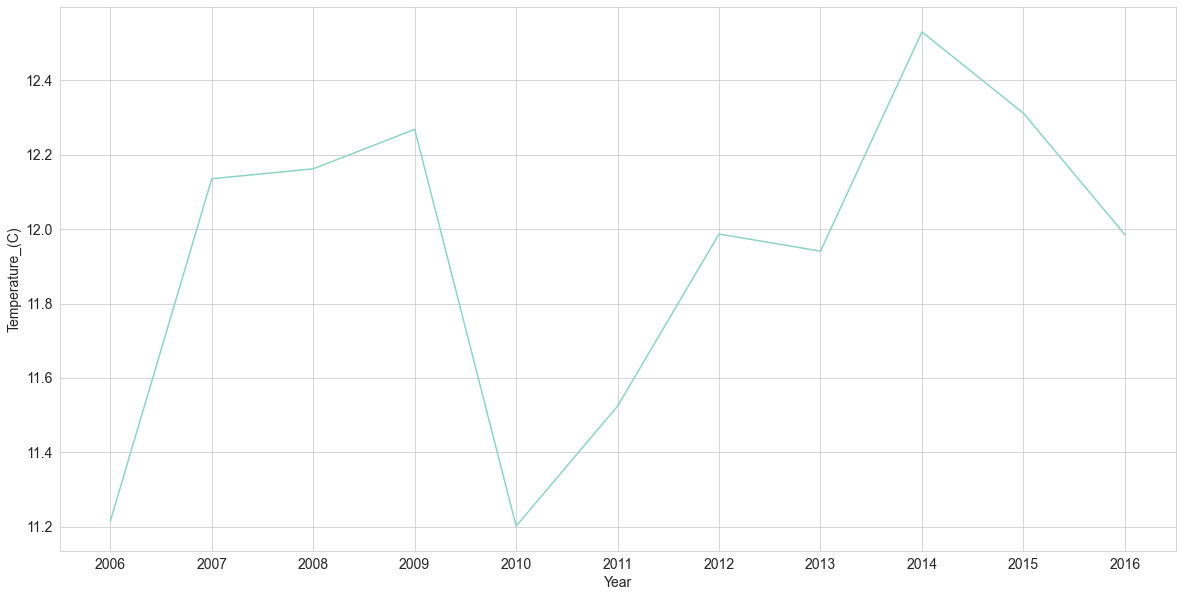

In [10]:
plt.figure(figsize=(20,10))
new = new_df2.groupby(["Year"]).mean()[["Temperature_(C)"]]
yearly_avg_temp = new.reset_index()
yearly_avg_temp
sns.lineplot(x=yearly_avg_temp["Year"],y=yearly_avg_temp["Temperature_(C)"])
plt.xticks(yearly_avg_temp["Year"])
plt.show()

#### Monthly average temperature

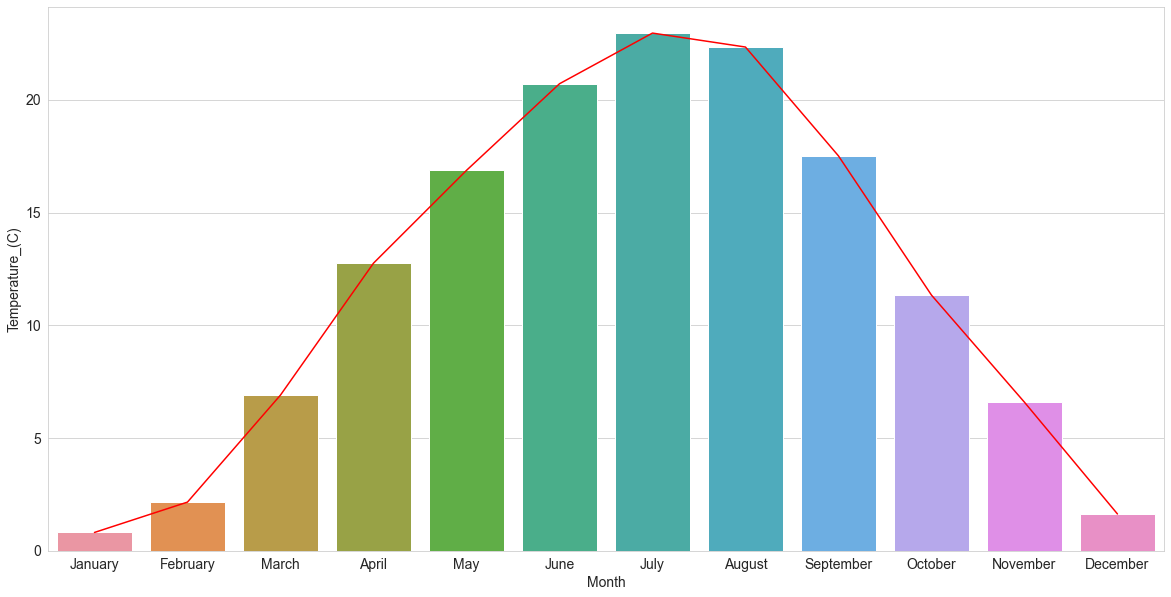

In [11]:
plt.figure(figsize=(20,10))
new_df = new_df2.groupby(["Month"]).mean()[["Temperature_(C)"]]
order=["January","February","March","April","May","June","July","August","September",
            "October","November","December"]
monthly_avg_temp = new_df.reindex(index=order)
sns.lineplot(x=monthly_avg_temp.index,y=monthly_avg_temp["Temperature_(C)"],color="r")
sns.barplot(x=monthly_avg_temp.index,y=monthly_avg_temp["Temperature_(C)"])
plt.xticks(monthly_avg_temp.index)
plt.show()

#### Monthly Average Actual Temp. & Apparent temp.

In [12]:
new_df = new_df2.groupby(["Month"]).mean()[["Temperature_(C)","Apparent_Temperature_(C)"]]
order=["January","February","March","April","May","June","July","August","September",
            "October","November","December"]
monthly_avg_temp = new_df.reindex(index=order)
monthly_avg_temp.head(12)

,Temperature_(C),Apparent_Temperature_(C)
Month,,
January,0.813890,-1.939615
February,2.159699,-0.565343
March,6.906599,5.074268
April,12.756417,12.141164
May,16.873692,16.732751
June,20.715617,20.742264
July,22.963943,22.976086
August,22.345031,22.270497
September,17.516790,17.404283


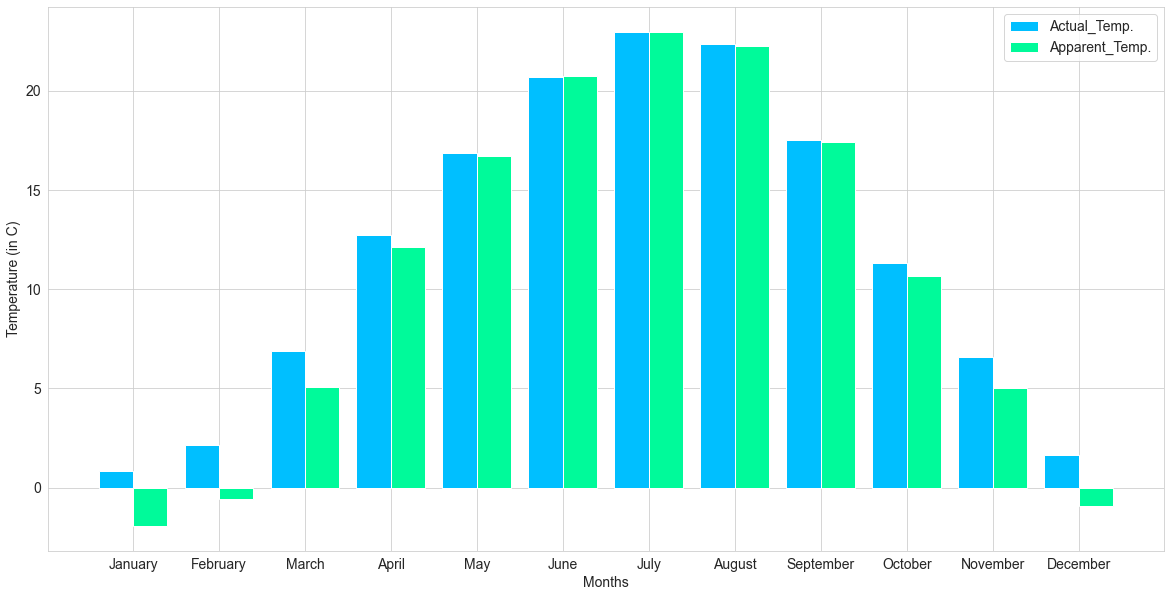

In [13]:
plt.figure(figsize=(20,10))
x_axis = np.arange(len(list(monthly_avg_temp.index)))
plt.bar(x_axis - 0.2,monthly_avg_temp["Temperature_(C)"],0.4,label="Actual_Temp.",color="deepskyblue")
plt.bar(x_axis + 0.2,monthly_avg_temp["Apparent_Temperature_(C)"],0.4,label="Apparent_Temp.",color="mediumspringgreen")
plt.xticks(x_axis,monthly_avg_temp.index)
plt.xlabel("Months")
plt.ylabel("Temperature (in C)")
plt.legend()
plt.show()

### B) Visualization for Wind speed

#### Yearly average Wind speed

In [14]:
new=new_df2.groupby("Year").mean()["Wind_Speed_(km/h)"]
yearly_wind_speed_avg = new.reset_index()
yearly_wind_speed_avg

,Year,Wind_Speed_(km/h)
0,2006,10.189852
1,2007,10.825392
2,2008,11.303897
3,2009,11.505948
4,2010,11.015628
5,2011,9.898262
6,2012,11.264545
7,2013,10.969389
8,2014,10.502473
9,2015,10.735247


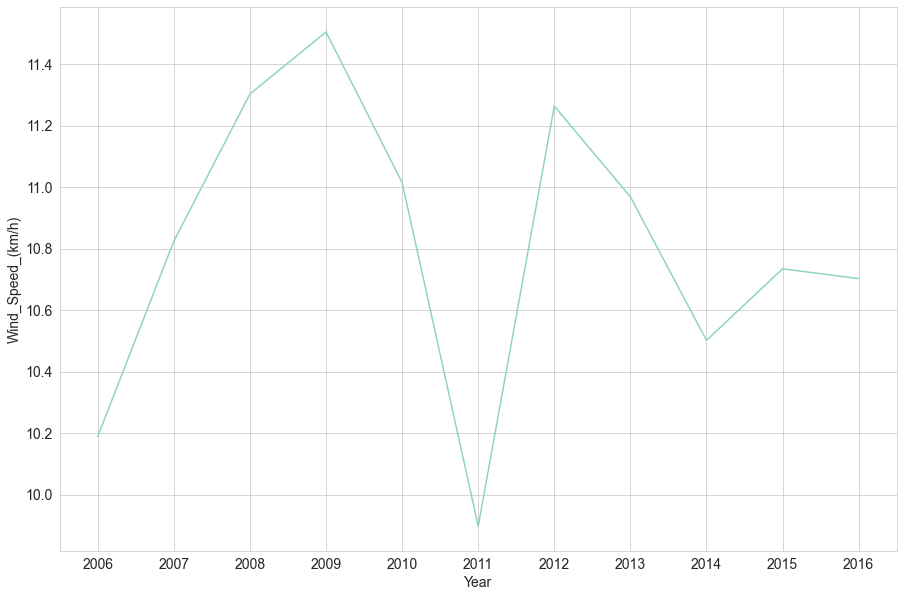

In [15]:
plt.figure(figsize=(15,10))
sns.lineplot(x=yearly_wind_speed_avg["Year"],y=yearly_wind_speed_avg["Wind_Speed_(km/h)"])
plt.xticks(yearly_wind_speed_avg["Year"].unique())
plt.show()

#### Monthly average Wind speed

In [16]:
new=new_df2.groupby("Month").mean()[["Wind_Speed_(km/h)"]]
order=["January","February","March","April","May","June","July","August","September",
            "October","November","December"]
new2 = new.reindex(index=order)
monthly_wind_speed_avg = new2.reset_index()
monthly_wind_speed_avg

,Month,Wind_Speed_(km/h)
0,January,11.512816
1,February,12.185543
2,March,13.405461
3,April,11.893094
4,May,10.959337
5,June,9.626471
6,July,9.639907
7,August,8.933431
8,September,9.621813
9,October,10.000153


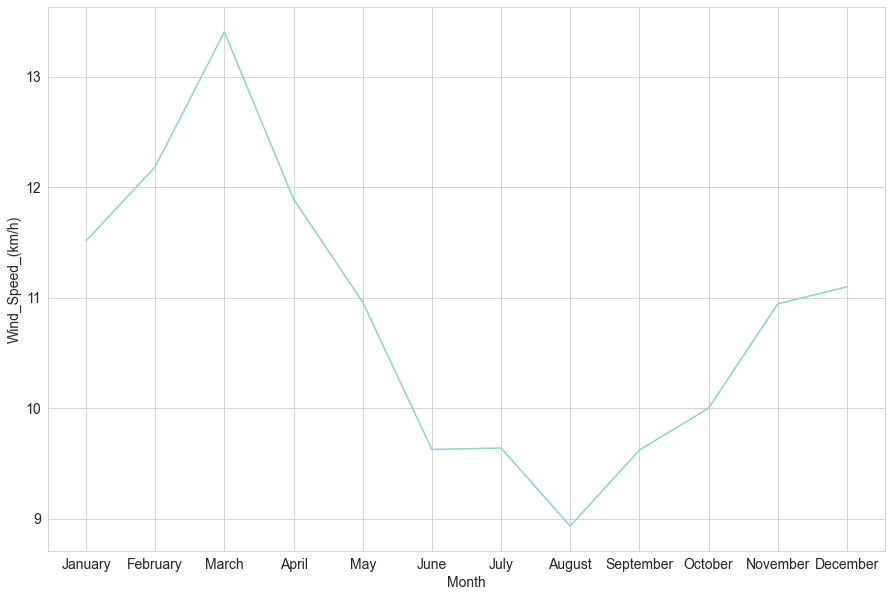

In [17]:
plt.figure(figsize=(15,10))
sns.lineplot(x=monthly_wind_speed_avg["Month"],y=monthly_wind_speed_avg["Wind_Speed_(km/h)"])
plt.xticks(monthly_wind_speed_avg["Month"].unique())
plt.show()

### C) Visualization for Summary

In [18]:
new = new_df2["Summary"].value_counts().to_frame()
new

,Summary
Partly Cloudy,31733
Mostly Cloudy,28094
Overcast,16597
Clear,10890
Foggy,7148
Breezy and Overcast,528
Breezy and Mostly Cloudy,516
Breezy and Partly Cloudy,386
Dry and Partly Cloudy,86
Windy and Partly Cloudy,67


#### Monthly Summary

In [19]:
plt.figure(figsize=(15,30))
new = new_df2.groupby("Month")["Summary"].value_counts().to_frame()
order=["January","February","March","April","May","June","July","August","September",
            "October","November","December"]
new.rename(columns={"Summary":"Value_counts"},inplace=True)
new2 = new.reset_index()
new2

,Month,Summary,Value_counts
0,April,Partly Cloudy,3046
1,April,Mostly Cloudy,2415
2,April,Overcast,1238
3,April,Clear,874
4,April,Foggy,135
...,...,...,...
176,September,Dry,4
177,September,Dry and Mostly Cloudy,3
178,September,Breezy,2
179,September,Humid and Mostly Cloudy,1


<Figure size 1080x2160 with 0 Axes>

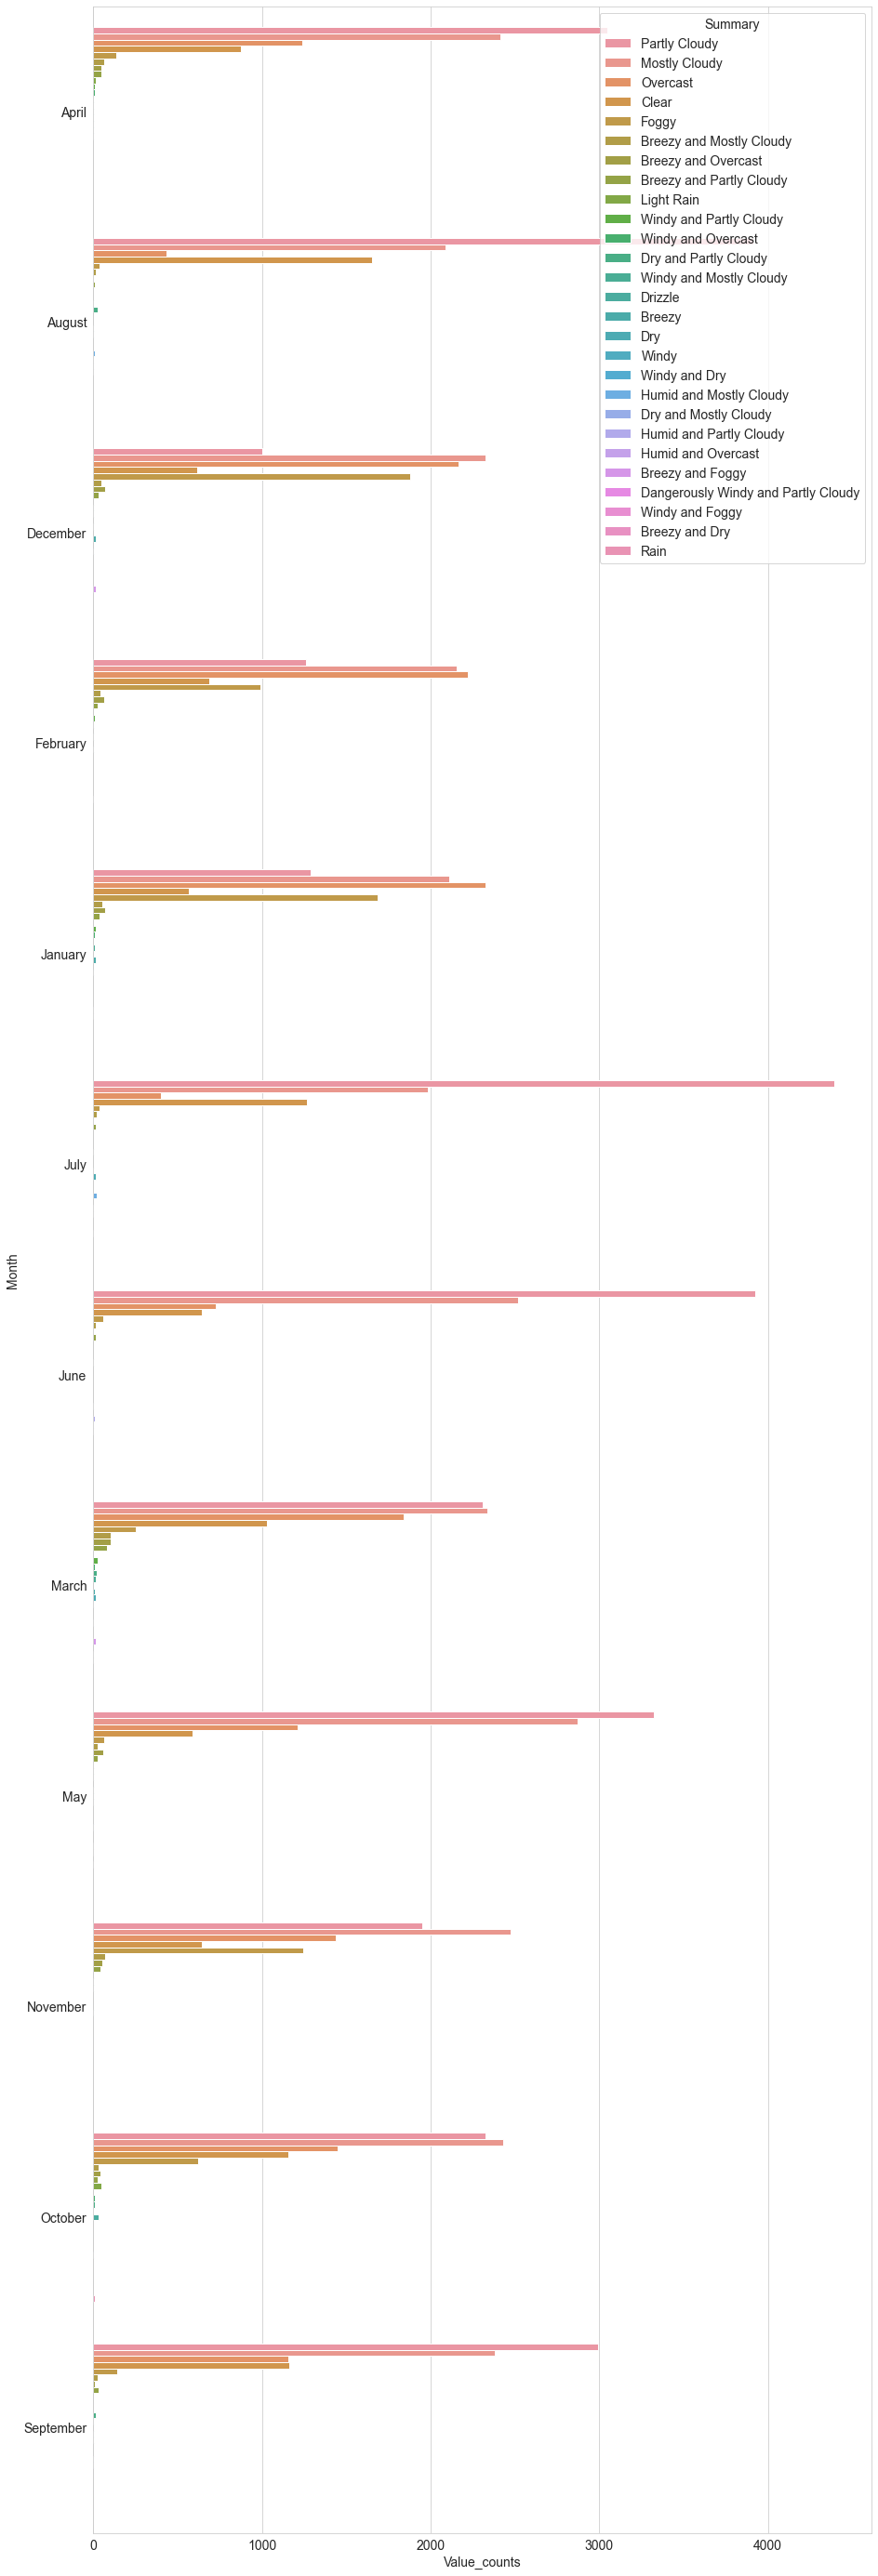

In [20]:
plt.figure(figsize=(15,50))
sns.barplot(y=new2["Month"],x=new2["Value_counts"],hue=new2["Summary"])
plt.show()

### D) Visualization for Visibility

#### Monthly average Visibility

In [21]:
new = new_df2.groupby("Month").mean()[["Visibility_(km)"]]
order=["January","February","March","April","May","June","July","August","September",
            "October","November","December"]
monthly_avg_visibility=new.reindex(index=order)
monthly_avg_visibility

,Visibility_(km)
Month,
January,7.830584
February,8.731368
March,10.910450
April,11.784224
May,11.892754
June,11.990266
July,12.187820
August,12.455549
September,11.602874


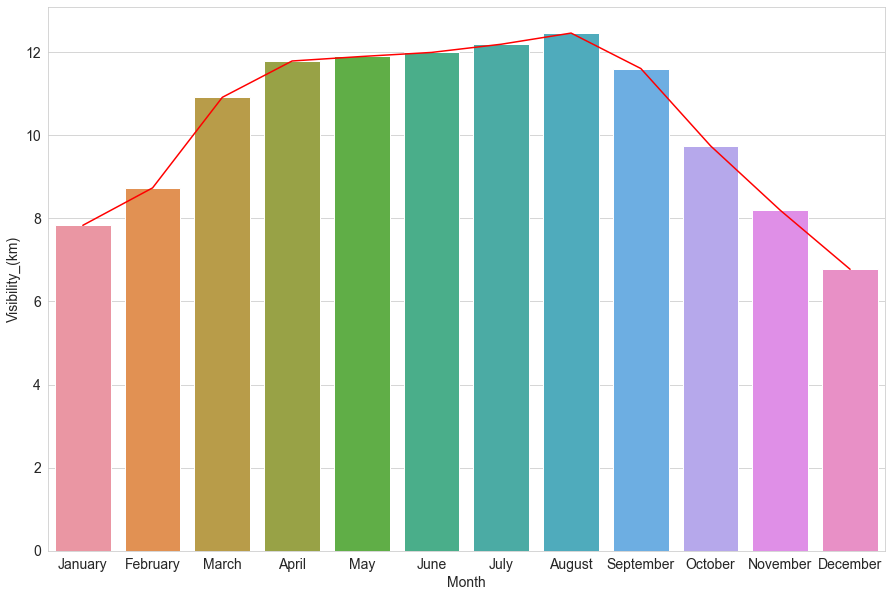

In [22]:
plt.figure(figsize=(15,10))
sns.lineplot(x=monthly_avg_visibility.index,y=monthly_avg_visibility["Visibility_(km)"],color="r")
sns.barplot(x=monthly_avg_visibility.index,y=monthly_avg_visibility["Visibility_(km)"])
plt.xticks(monthly_avg_visibility.index)
plt.show()

### E) Visualization for Humidity

#### Monthly average Humidity

In [23]:
new = new_df2.groupby("Month").mean()[["Humidity"]]
order=["January","February","March","April","May","June","July","August","September",
            "October","November","December"]
monthly_avg_humidity=new.reindex(index=order)
monthly_avg_humidity

,Humidity
Month,
January,0.850723
February,0.813400
March,0.702966
April,0.641133
May,0.691325
June,0.686470
July,0.639657
August,0.635542
September,0.688790


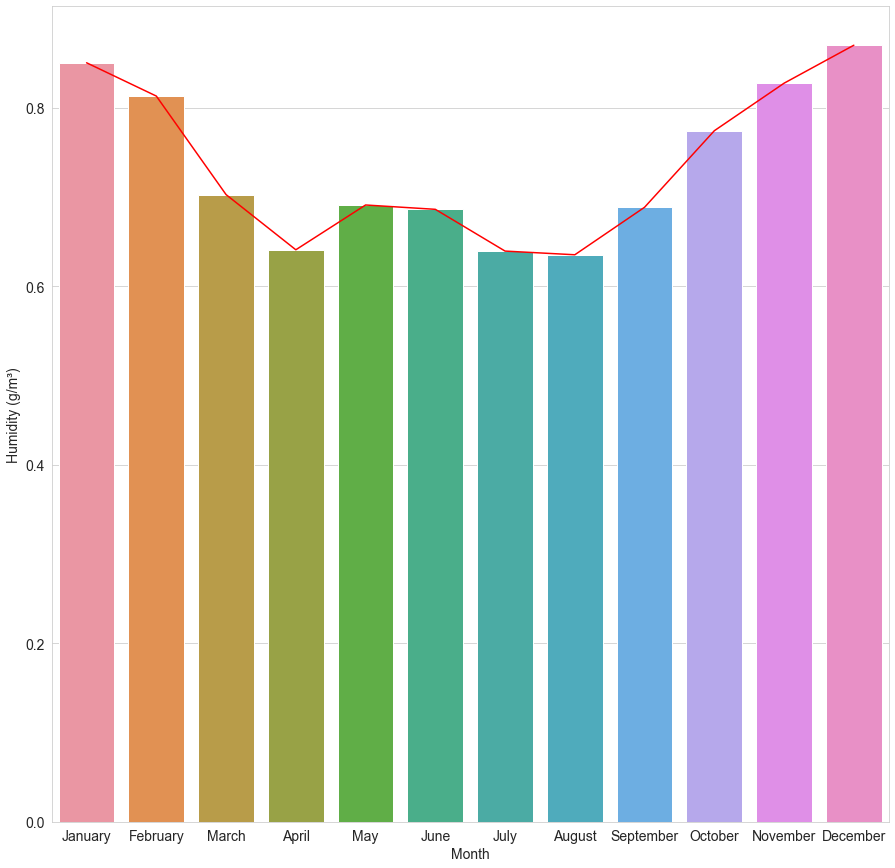

In [24]:
plt.figure(figsize=(15,15))
sns.lineplot(x=monthly_avg_humidity.index,y=monthly_avg_humidity["Humidity"],color="r")
sns.barplot(x=monthly_avg_humidity.index,y=monthly_avg_humidity["Humidity"])
plt.xticks(monthly_avg_humidity.index)
plt.ylabel("Humidity (g/m\u00b3)")
plt.show()

### F) Visualization for Precip. type

#### Monthly precip. type

In [25]:
new = new_df2.groupby("Month")["Precip_Type"].describe()
order=["January","February","March","April","May","June","July","August","September",
            "October","November","December"]
monthly_avg_precip=new.reindex(index=order)
monthly_avg_precip

,count,unique,top,freq
Month,,,,
January,8184,2,rain,4603
February,7464,2,rain,4940
March,8173,2,rain,7239
April,7842,2,rain,7820
May,8119,1,rain,8119
June,7920,1,rain,7920
July,8181,1,rain,8181
August,8208,1,rain,8208
September,7920,1,rain,7920


### G) Correlation between all columns

In [26]:
new = new_df2.drop(columns=["Loud_Cover", "Year", "Day"])
corr_df = new.corr()
corr_df

,Temperature_(C),Apparent_Temperature_(C),Humidity,Wind_Speed_(km/h),Wind_Bearing_(degrees),Visibility_(km),Pressure_(millibars)
Temperature_(C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,-0.005447
Apparent_Temperature_(C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,0.005454
Wind_Speed_(km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,-0.049263
Wind_Bearing_(degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,-0.011651
Visibility_(km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,0.059818
Pressure_(millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,1.000000


#### Visualize correlation as heat map

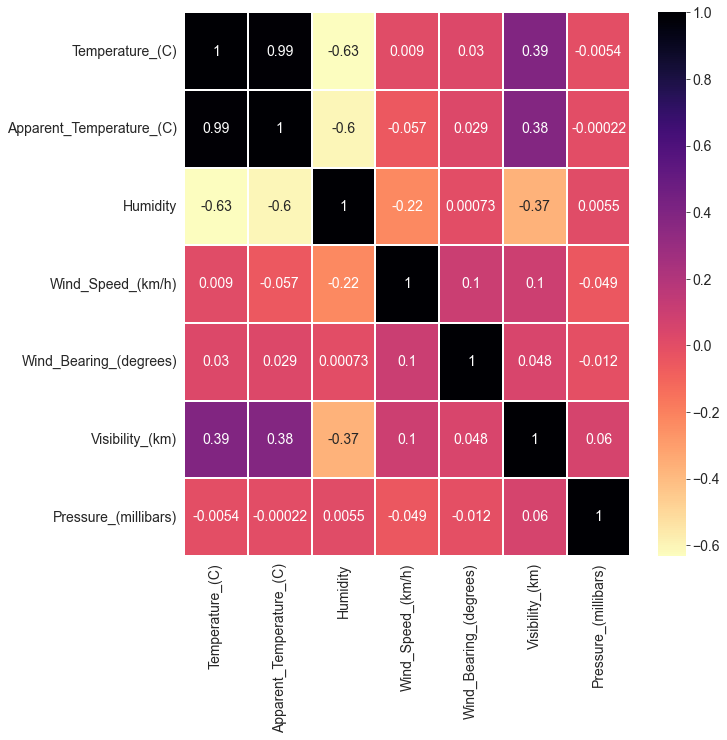

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_df,annot=True,cmap='magma_r',linewidths=0.2)
plt.show()

## 3) Inferences and Conclusion

> - Dec., Jan. & Feb. are the coldest months for any year, having temp. less then 1 °C, and in these months the apparent temp. is very low then the actual temperature.
>
> - July & Aug. are the hottest months for any year, having temperature more then 22 °C.
>
> - The Wind speed is very high in between the months of Feb. & March and it is least in between the months of July and August.
>
> - The Visibility recorded least in the month of Dec. & Jan., and in these months, most of the days have Overcast condition and have very high Humidity. 
>
> - The Visibility recorded most in the month of July & Aug., and in these months, most of the days are partly cloudy and have least Humidity.
